# Credit Card Segmentation KMeans

In this project we will play the role of a data scientist working for a credit card company. We will utilize a dataset of existing clients to help segment them into different groups in order to apply different business strategies for each type of customer. For example we could create incentives for customers who have a high income but don't use their card much. We will use the KMeans unsupervised machine learning technique to determine the attributes for or targeting campaign.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# importing libraries

### Data Profiling

In [2]:
customers = pd.read_csv("customer_segmentation.csv")

customers.head()

# importing dataset and viewing data

,customer_id,age,gender,dependent_count,education_level,marital_status,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio
0,768805383,45,M,3,High School,Married,69000,39,5,1,12691.0,1144,42,0.061
1,818770008,49,F,5,Graduate,Single,24000,44,6,1,8256.0,1291,33,0.105
2,713982108,51,M,3,Graduate,Married,93000,36,4,1,3418.0,1887,20,0.000
3,769911858,40,F,4,High School,Unknown,37000,34,3,4,3313.0,1171,20,0.760
4,709106358,40,M,3,Uneducated,Married,65000,21,5,1,4716.0,816,28,0.000


In [3]:
customers.info()

# checking datatypes and null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               10127 non-null  int64  
 1   age                       10127 non-null  int64  
 2   gender                    10127 non-null  object 
 3   dependent_count           10127 non-null  int64  
 4   education_level           10127 non-null  object 
 5   marital_status            10127 non-null  object 
 6   estimated_income          10127 non-null  int64  
 7   months_on_book            10127 non-null  int64  
 8   total_relationship_count  10127 non-null  int64  
 9   months_inactive_12_mon    10127 non-null  int64  
 10  credit_limit              10127 non-null  float64
 11  total_trans_amount        10127 non-null  int64  
 12  total_trans_count         10127 non-null  int64  
 13  avg_utilization_ratio     10127 non-null  float64
dtypes: flo

In [4]:
customers_numbers = customers.select_dtypes(include=["int64", "float64"])

# pulling numeric columns only

In [5]:
customers_numbers.describe()

# viewing summary stats for numeric columns for anomolies

,customer_id,age,dependent_count,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,62078.206774,35.928409,3.812580,2.341167,8631.953698,4404.086304,64.858695,0.274894
std,3.690378e+07,8.016814,1.298908,39372.861291,7.986416,1.554408,1.010622,9088.776650,3397.129254,23.472570,0.275691
min,7.080821e+08,26.000000,0.000000,20000.000000,13.000000,1.000000,0.000000,1438.300000,510.000000,10.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,32000.000000,31.000000,3.000000,2.000000,2555.000000,2155.500000,45.000000,0.023000
50%,7.179264e+08,46.000000,2.000000,50000.000000,36.000000,4.000000,2.000000,4549.000000,3899.000000,67.000000,0.176000
75%,7.731435e+08,52.000000,3.000000,80000.000000,40.000000,5.000000,3.000000,11067.500000,4741.000000,81.000000,0.503000
max,8.283431e+08,73.000000,5.000000,200000.000000,56.000000,6.000000,6.000000,34516.000000,18484.000000,139.000000,0.999000


The dataset has a total of 10,126 rows/customers with 14 columns/features. The only non-relevant column we can eliminate off the bat is customers_id as this is unique ID for each customer and does not a quantitative measure. There are three qualitiative columns: gender, educational_level and marital_status which we will need to convert to some numerical form. There are no missing values and no anomalies to note in the numeric column distributions.

<AxesSubplot:>

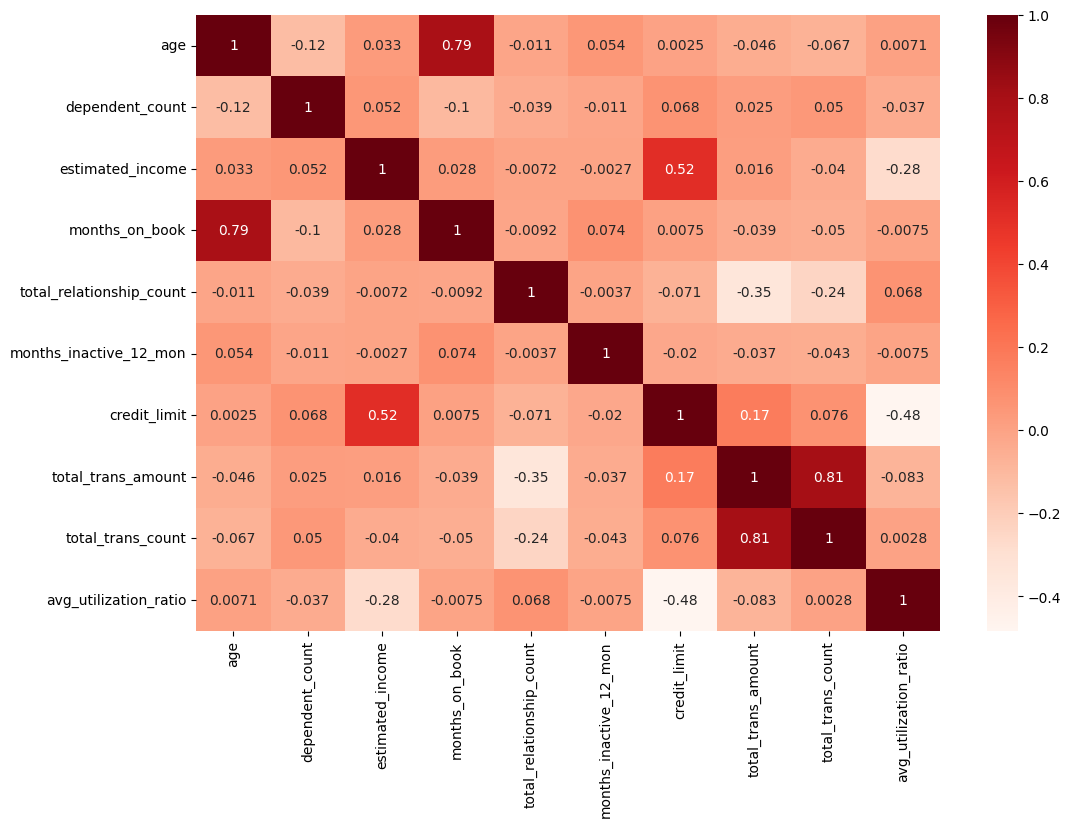

In [6]:
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(customers.drop('customer_id', axis=1).corr(),annot=True, cmap='Reds')

# plotting a heatmap to see correlations

### Data Cleaning / Feature Engineering

In [7]:
customers_modif = customers.copy()

# creating a copy of the DF before cleaning

In [8]:
customers_modif["gender"] = customers_modif["gender"].map({"F": 0, "M": 1})

customers_modif["education_level"] = customers_modif["education_level"].map({"Uneducated" : 0, "High School" : 1, "College" : 2, "Graduate" : 3, "Post-Graduate" : 4, "Doctorate" : 5})

# maps categorical values to numerics

In [9]:
print(customers_modif["gender"].value_counts())

print(customers_modif["education_level"].value_counts())

# confirming mapping functions worked correctly with no missing values

0    5358
1    4769
Name: gender, dtype: int64
3    3685
1    2351
0    1755
2    1192
4     616
5     528
Name: education_level, dtype: int64


In [10]:
dummies = pd.get_dummies(customers_modif[['marital_status']], drop_first=True)

customers_modif = pd.concat([customers_modif, dummies], axis=1)
customers_modif.drop(['marital_status'], axis=1, inplace=True)

# creates a dummies DF for marital status and concats with original customers DF while dropping the inital column

In [11]:
customers_modif.head()

# Reviewing updated dummies columns

,customer_id,age,gender,dependent_count,education_level,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio,marital_status_Married,marital_status_Single,marital_status_Unknown
0,768805383,45,1,3,1,69000,39,5,1,12691.0,1144,42,0.061,1,0,0
1,818770008,49,0,5,3,24000,44,6,1,8256.0,1291,33,0.105,0,1,0
2,713982108,51,1,3,3,93000,36,4,1,3418.0,1887,20,0.000,1,0,0
3,769911858,40,0,4,1,37000,34,3,4,3313.0,1171,20,0.760,0,0,1
4,709106358,40,1,3,0,65000,21,5,1,4716.0,816,28,0.000,1,0,0


In [12]:
X = customers_modif.drop('customer_id', axis=1)

scaler = StandardScaler()
scaler.fit(X)

X_scaled = scaler.transform(X)

X = pd.DataFrame(X_scaled)

# creates a DF with features of interest, scales the values and reassigns the results to a df

### Determining Number of Clusters & Analyzing Results

In [13]:
inertia = []

for k in range(1, 11):
    model = KMeans(n_clusters = k)
    y = model.fit_predict(X)
    inertia.append(model.inertia_)

# Runs the model through a loop of clusters and determines the inertia of each    

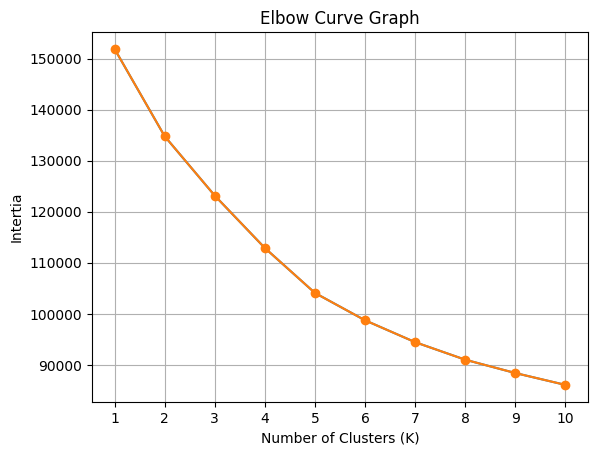

In [14]:
plt.plot(list(range(1,11)), inertia)
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Intertia")
plt.title("Elbow Curve Graph")
plt.xticks(ticks=range(1, 11), labels=range(1, 11))
plt.grid(True)
plt.plot(range(1, 11), inertia, marker='o')

Based on the elbow plot above, it appears k = 5 will be the ideal number of clusters to minimize interia while not overdoing the number of clusters to find meaningful relationships bewteen features.

### Analyzing Model Results

In [15]:
model = KMeans(n_clusters = 5)
y = model.fit_predict(X)

# running the model again (X is normalized in the code above) for the optimal k = 5 found above

In [16]:
customers["CLUSTER"] = y + 1
customers.head()

# creates a column cluster

,customer_id,age,gender,dependent_count,education_level,marital_status,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio,CLUSTER
0,768805383,45,M,3,High School,Married,69000,39,5,1,12691.0,1144,42,0.061,2
1,818770008,49,F,5,Graduate,Single,24000,44,6,1,8256.0,1291,33,0.105,1
2,713982108,51,M,3,Graduate,Married,93000,36,4,1,3418.0,1887,20,0.000,2
3,769911858,40,F,4,High School,Unknown,37000,34,3,4,3313.0,1171,20,0.760,3
4,709106358,40,M,3,Uneducated,Married,65000,21,5,1,4716.0,816,28,0.000,5


In [17]:
numeric_cols = customers.drop(["customer_id", "gender", "education_level", "marital_status", "CLUSTER"], axis = 1).columns

numeric_cols

# creating a list of column names to loop through and plot graphs

Index(['age', 'dependent_count', 'estimated_income', 'months_on_book',
       'total_relationship_count', 'months_inactive_12_mon', 'credit_limit',
       'total_trans_amount', 'total_trans_count', 'avg_utilization_ratio'],
      dtype='object')

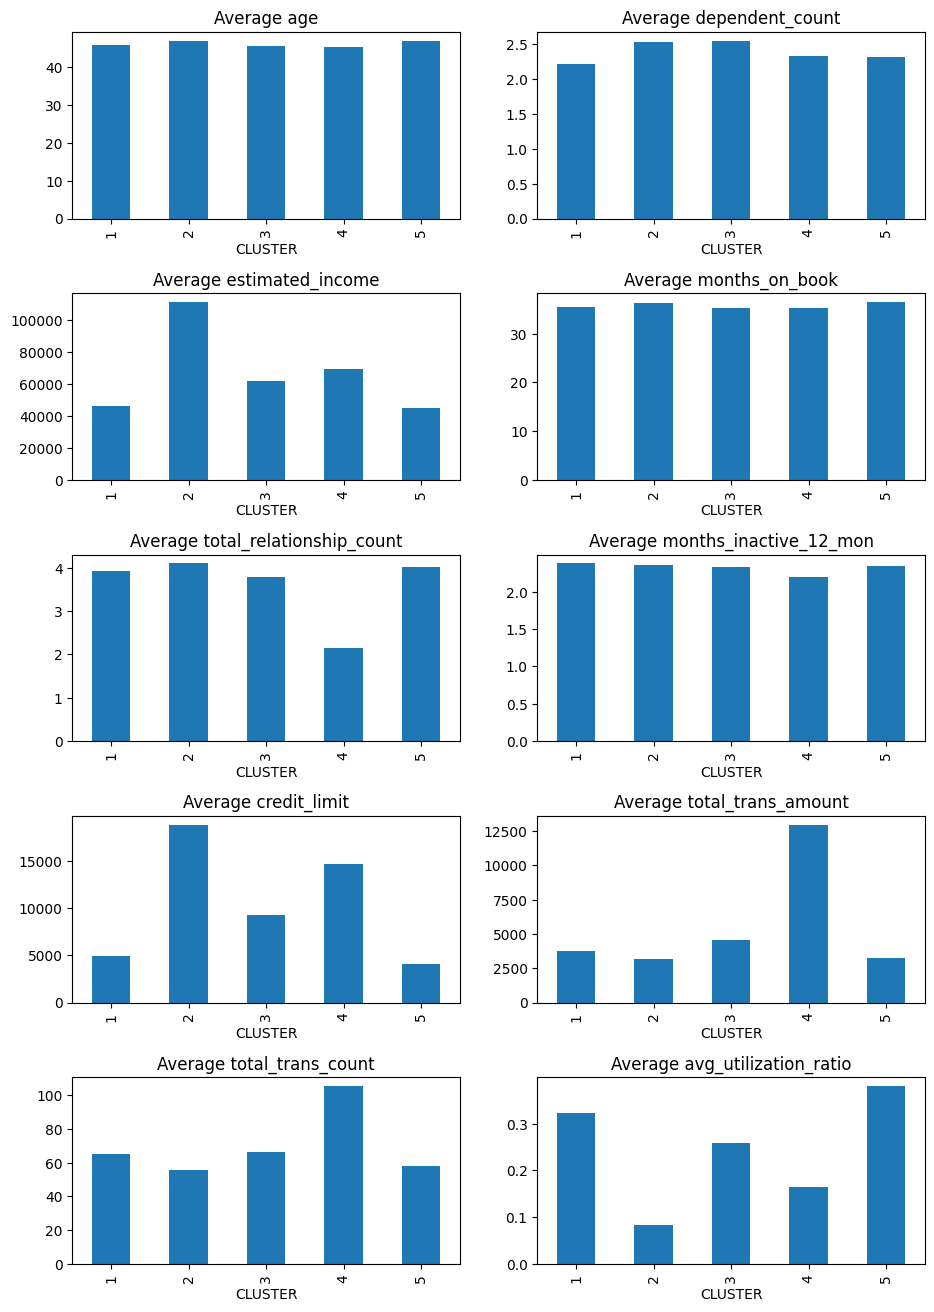

In [18]:
plt.figure(figsize=(11,16))
plot_count = 1

for col in numeric_cols:
    plt.subplot(5,2,plot_count)
    customers.groupby("CLUSTER")[col].mean().plot.bar()
    plt.title(f"Average {col}")
    plot_count += 1
    plt.subplots_adjust(hspace = .4)   

plt.show()

# plotting the counts between clusters

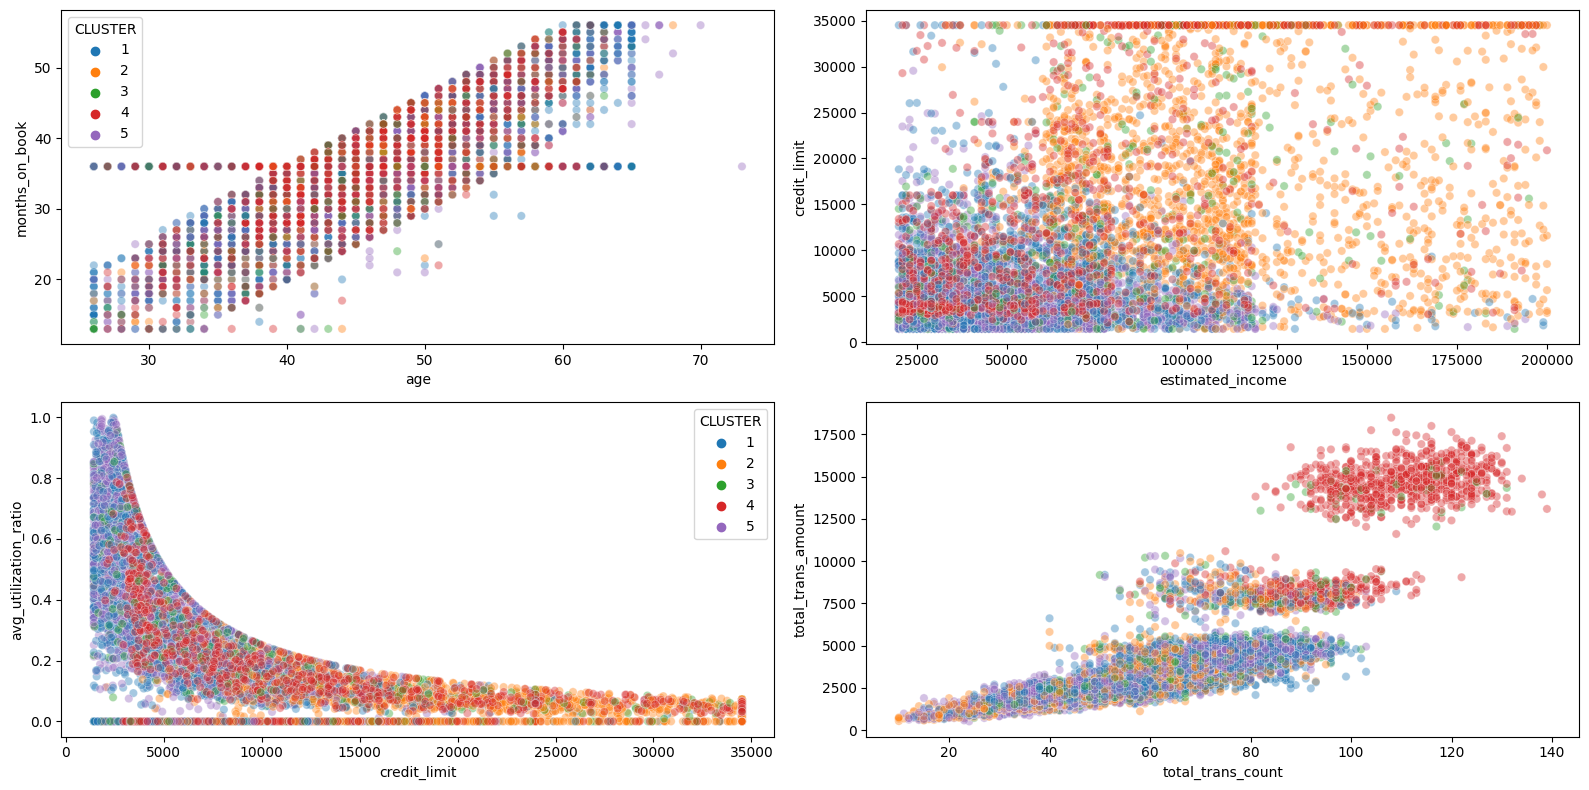

In [19]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 8))
sns.scatterplot(x='age', y='months_on_book', hue='CLUSTER', data=customers, palette='tab10', alpha=0.4, ax=ax1)
sns.scatterplot(x='estimated_income', y='credit_limit', hue='CLUSTER', data=customers, palette='tab10', alpha=0.4, ax=ax2, legend=False)
sns.scatterplot(x='credit_limit', y='avg_utilization_ratio', hue='CLUSTER', data=customers, palette='tab10', alpha=0.4, ax=ax3)
sns.scatterplot(x='total_trans_count', y='total_trans_amount', hue='CLUSTER', data=customers, palette='tab10', alpha=0.4, ax=ax4, legend=False)

plt.tight_layout()
plt.show()

# plots variables with a high correlation showing the split between clusters

/tmp/ipykernel_6268/906250918.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels)


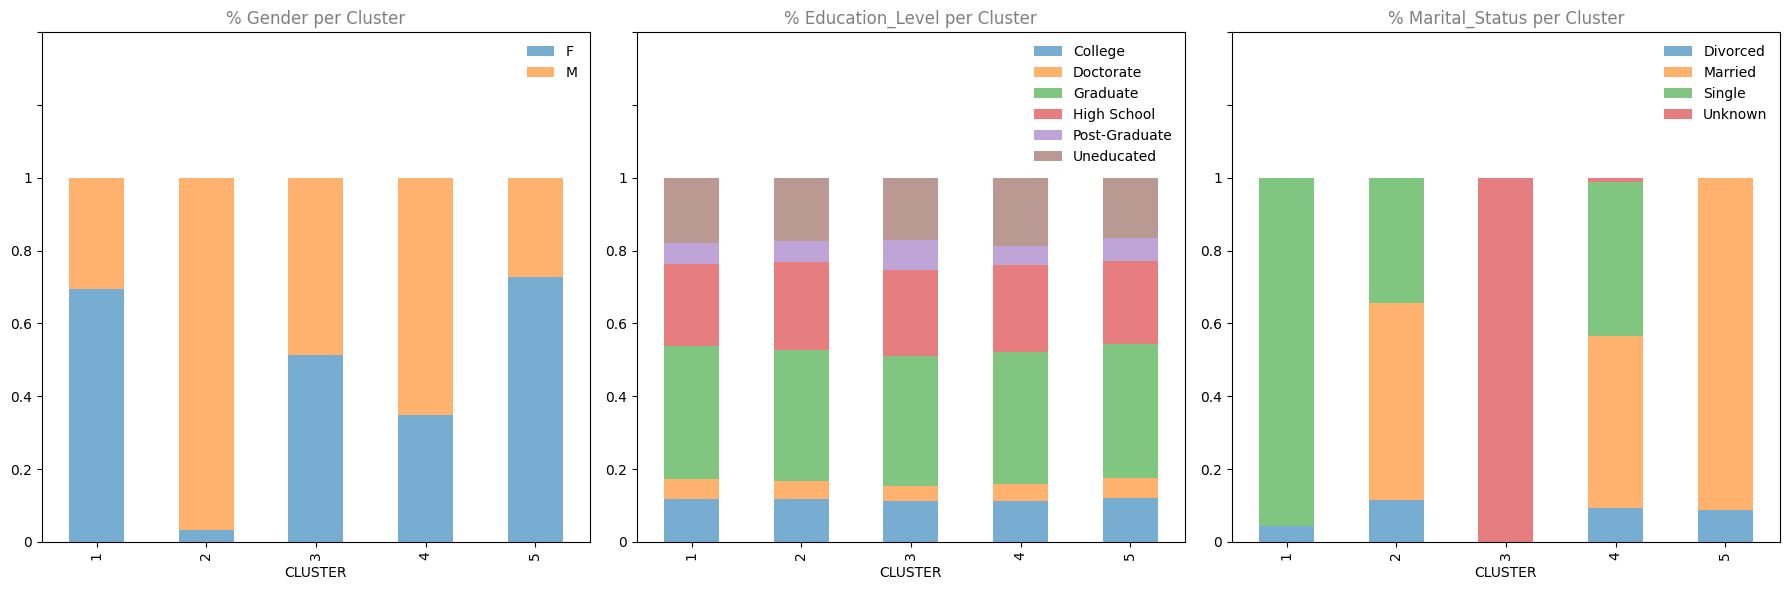

In [29]:
cat_columns = customers.select_dtypes(include=['object'])

fig = plt.figure(figsize=(18, 6))
for i, col in enumerate(cat_columns):
    plot_df = pd.crosstab(index=customers['CLUSTER'], columns=customers[col], values=customers[col], aggfunc='size', normalize='index')
    ax = fig.add_subplot(1, 3, i+1)
    plot_df.plot.bar(stacked=True, ax=ax, alpha=0.6)
    ax.set_title(f'% {col.title()} per Cluster', alpha=0.5)

    ax.set_ylim(0, 1.4)
    ax.legend(frameon=False)
    ax.xaxis.grid(False)
    
    labels = [0, 0.2, 0.4, 0.6, 0.8, 1]
    ax.set_yticklabels(labels)

plt.tight_layout()
plt.show()

# plots the distribution of categorical characteristics

#### Patterns in the data

Group 1 is 70% males, mostly all single, has a low income, low credit limit, low transaction amount, but the second highest utilization ratio. This group utilizes their cards frequently but does not spend much.

Group 2 is mostly all male, about about 50% married, 30% single, has the highest income, highest credit limit but also has the lowest utilization rate, transaction count and transaction amount. Sounds like males need to be targeted to use their cards more as they have the highest income but lowest use of their cards.

Group 3 is split down the middle gender wise, with an unknown marital status.  Also falls in the middle of the distribution of the variables. This doesn't provide any strong conclusions.

Group 4 is about 60% male and mostly married or single, has the highest transaction amount (money spent), a mid-line utilization rate and the highest transaction count, but the lowest relationship count (number of times contacted the company. This means the highest spenders don't necessarily use their card daily but it would seem when they do they use it a lot and spend a lot.

Group 5 is 75% female and mostly all married with the lowest income, low transaction amount (money spent), lowest transaction count, but highest utilzation ratio. This although low income folks married folks use their cards often but don't spend much.